## Avocado Project
#### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
#### Some relevant columns in the dataset:
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
df = pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv.zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The above dataset shows the retail scan data of volumes and prices, through this data we aim to find the regional distribution and average prices of avocados, which could be valuable for market analysis and decision-making in the avocado industry.

In [6]:
# We will start with data preprocessing
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# We will drop unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

Moving forward we will need to Split the dataset for classification and regression tasks. 
* Classification task: Predict region
* Regression task: Predict average price

In [15]:
#Classification Task (Defining features and target variable)
x_class = df.drop(['region', 'Date'], axis=1)
y_class = df['region']

In [16]:
# Split data into training and testing sets
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

In [17]:
# Initialize and train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_class_train, y_class_train)

RandomForestClassifier(random_state=42)

In [20]:
#Prediction
y_class_pred = rf_classifier.predict(x_class_test)

In [21]:
# Evaluate classification model
print("Classification Report:\n", classification_report(y_class_test, y_class_pred))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_class_pred))

Classification Report:
                      precision    recall  f1-score   support

             Albany       0.87      0.95      0.91        63
            Atlanta       0.85      0.86      0.86        73
BaltimoreWashington       0.98      0.98      0.98        61
              Boise       0.91      0.89      0.90        72
             Boston       0.89      0.94      0.91        67
   BuffaloRochester       0.86      0.81      0.83        73
         California       0.98      0.98      0.98        62
          Charlotte       0.97      0.87      0.92        76
            Chicago       0.97      0.96      0.97        72
   CincinnatiDayton       0.91      0.89      0.90        65
           Columbus       0.90      0.82      0.85        65
      DallasFtWorth       0.93      0.99      0.96        68
             Denver       0.97      0.92      0.94        65
            Detroit       0.81      0.85      0.83        66
        GrandRapids       0.91      0.96      0.93        71

In [31]:
# Regression Task (Define features and target variable)
x_reg = pd.get_dummies(df.drop(['AveragePrice', 'Date'], axis=1), drop_first=True)
y_reg = df['AveragePrice']

In [32]:
# Split data into training and testing sets
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [33]:
# Initialize and train RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_reg_train, y_reg_train)

RandomForestRegressor(random_state=42)

In [34]:
#Prediction
y_reg_pred = rf_regressor.predict(x_reg_test)

In [35]:
# Evaluation of regression model
print("\nRegression Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_reg_test, y_reg_pred))
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_reg_pred))
print("R2 Score:", r2_score(y_reg_test, y_reg_pred))


Regression Metrics:
Mean Absolute Error: 0.10686191780821917
Mean Squared Error: 0.0230808232219178
R2 Score: 0.8563455846929839


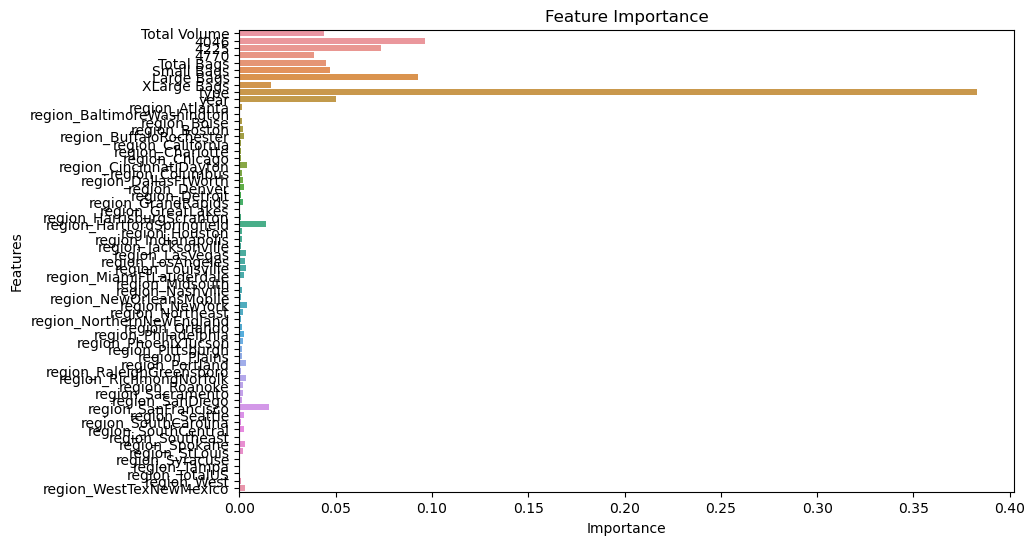

In [36]:
# Feature Importance
feature_importance = rf_regressor.feature_importances_
features = x_reg.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The model effectively tackled both classification and regression tasks on the avocado dataset. It provided insights into regional distribution and average prices of avocados, which could be valuable for market analysis and decision-making in the avocado industry. Further optimization and fine-tuning of the models could potentially enhance their performance.